## Setup

In [73]:
import os
import numpy as np
np.random.seed(2018)
import pandas as pd
from sklearn.manifold import TSNE

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

In [75]:
DATA_DIR = os.path.join(os.path.expanduser('~'), 'find-tune', 'data')
data = np.load(os.path.join(DATA_DIR, 'embedding_data.npz'))
X, y, c, s, ids = data['X'], data['y'], data['c'], data['s'], data['i']
c = ['Target' if cat == 'target' else cat for cat in c]

In [76]:
tsne = TSNE(n_components=2, random_state=2018)
X_2D = tsne.fit_transform(X)
print(X_2D.shape)

(3452, 2)


In [80]:
def plot_factory(categories=5):
    if type(categories) is int: 
        n = categories
        assert n > 0
        non_target_cats = list(set(c).difference(set(['Target'])))
        non_target_cats = list(np.random.choice(non_target_cats, size=n-1)) if n > 1 else []
        plot_categories = ['Target'] + non_target_cats
        plot_labs = [cat if cat in plot_categories else 'Other' for cat in c]
                               
        n_cols = len(plot_categories) + 1 # Extra one for the remainder not in plot_categories
        sns.set_palette(sns.color_palette("cubehelix", n_colors=n_cols+1))
        
        # Create a DataFrame for plotting the dimensionality-reduced data
        df_tsne = pd.DataFrame(X_2D, columns = ['dim1', 'dim2'])
        df_tsne['Category'] = plot_labs
        # Scatter
        sns.scatterplot(x='dim1', y='dim2', data=df_tsne,
                        hue='Category', hue_order=plot_categories + ['Other'],
                        alpha=0.75)
    else:
        raise NotImplementedError()
        
    return df_tsne

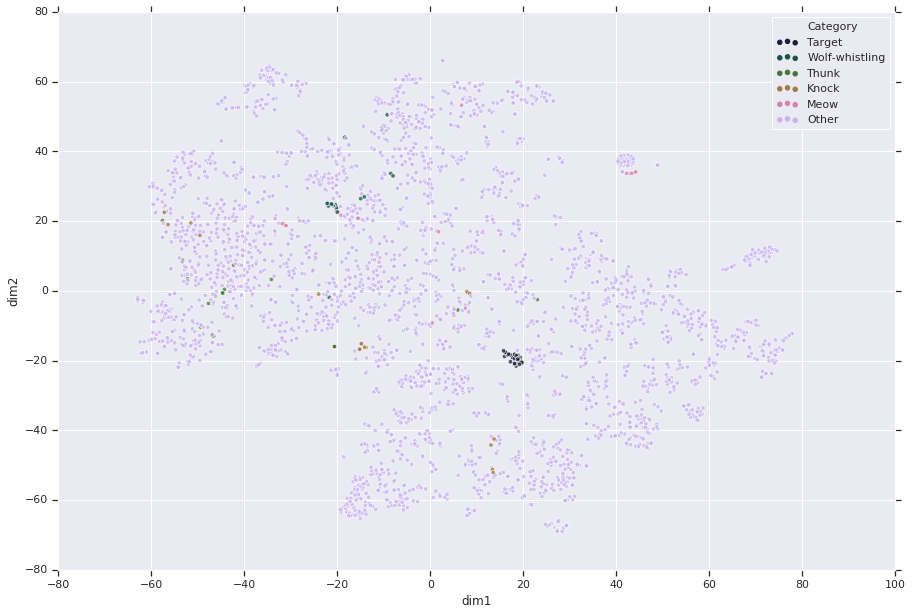

In [81]:
_ = plot_factory(5)